<h3 
    align="center" 
    style="font-size: 80px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:10px;background-color: darkblue">
    <span style="color: white;"> SPAM SMS DETECTION </span>
</h3>

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">Importing Libraries  </span>
</h3>

In [62]:
import pandas as pd

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">Loading Dataset </span>
</h3>

In [3]:
# Data is not utf-8 encoded, so reading the dataset with latin-8 encoding
data = pd.read_csv('spam.csv', engine = 'python', encoding = 'latin-1' )

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">Feature Engineering</span>
</h3>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [70]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [6]:
# Dropping Unnecessary columns
data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">Text Preprocessing </span>
</h3>

In [8]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [12]:
# Making sure that the data is not contains values except alphabets and numerics

corpus = []
for i in range(len(data['v2'])):
    review = re.sub('[^a-zA-Z0-9]', ' ', data.v2[i])
    review = review.lower()
    corpus.append(review)

In [18]:
data['v2'] = corpus
corpus = data['v2']

In [20]:
# Using stopwords method to drop unnecessary words(like the,is).
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokenized = text.split()
    filtered_tokens = [word for word in tokenized if word not in stop_words]
    return ' '.join(filtered_tokens)

corpus.apply(remove_stopwords)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

In [25]:
# lemmatizing the text for saving memory space and for increasing the accuracy of the text
lem = WordNetLemmatizer()

for i in corpus:
    words = nltk.word_tokenize(i)
    for word in words:
        if word not in stop_words:
            print(lem.lemmatize(word))

go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat
ok
lar
joking
wif
u
oni
free
entry
2
wkly
comp
win
fa
cup
final
tkts
21st
may
2005
text
fa
87121
receive
entry
question
std
txt
rate
c
apply
08452810075over18
u
dun
say
early
hor
u
c
already
say
nah
think
go
usf
life
around
though
freemsg
hey
darling
3
week
word
back
like
fun
still
tb
ok
xxx
std
chgs
send
1
50
rcv
even
brother
like
speak
treat
like
aid
patent
per
request
melle
melle
oru
minnaminunginte
nurungu
vettam
set
callertune
caller
press
9
copy
friend
callertune
winner
valued
network
customer
selected
receivea
900
prize
reward
claim
call
09061701461
claim
code
kl341
valid
12
hour
mobile
11
month
u
r
entitled
update
latest
colour
mobile
camera
free
call
mobile
update
co
free
08002986030
gon
na
home
soon
want
talk
stuff
anymore
tonight
k
cried
enough
today
six
chance
win
cash
100
20
000
pound
txt
csh11
send
87575
cost
150p
day
6days
16
tsandcs
apply
reply
hl
4
info
urgent
1
week
free
membership
100


mobile
c
08717898035
3
00
sub
16
unsub
reply
x
yes
pretty
lady
like
single
recieve
tone
within
next
24hrs
term
condition
please
see
channel
u
teletext
pg
750
jay
say
double
faggot
private
2003
account
statement
07815296484
show
800
un
redeemed
point
call
08718738001
identifier
code
41782
expires
18
11
04
today
sunday
sunday
holiday
work
gudnite
tc
practice
going
late
called
hoping
l8r
malaria
know
miss
guy
miss
ban
big
pls
give
love
especially
great
day
good
afternoon
love
go
day
hope
maybe
got
lead
job
think
boytoy
send
passionate
kiss
across
sea
probably
gon
na
see
later
tonight
lt
maybe
fat
finger
press
button
know
ummmmmaah
many
many
happy
return
day
dear
sweet
heart
happy
birthday
dear
tirupur
da
started
office
call
www
applausestore
com
monthlysubscription
50p
msg
max6
month
csc
web
age16
2stop
txt
stop
famous
quote
develop
ability
listen
anything
unconditionally
without
losing
temper
self
confidence
mean
married
going
college
pa
else
ill
come
self
pa
4
oclock
mine
bash
flat
plan

better
made
friday
stuffed
like
pig
yesterday
feel
bleh
least
writhing
pain
kind
bleh
sell
ton
coin
sell
coin
someone
thru
paypal
voila
money
back
life
pocket
theyre
lot
place
hospital
medical
place
safe
getting
touch
folk
waiting
company
txt
back
name
age
opt
enjoy
community
150p
sm
also
sorta
blown
couple
time
recently
id
rather
text
blue
looking
weed
sent
score
sophas
secondary
application
school
think
thinking
applying
research
cost
also
contact
joke
ogunrinde
school
one
le
expensive
one
cant
wait
see
photo
useful
ur
cash
balance
currently
500
pound
maximize
ur
cash
send
go
86688
150p
msg
cc
08718720201
po
box
114
14
tcr
w1
hey
booked
kb
sat
already
lesson
going
ah
keep
sat
night
free
need
meet
confirm
lodging
chk
ur
belovd
m
dict
time
want
come
awesome
lem
know
whenever
around
shb
b
ok
lor
thanx
beautiful
truth
gravity
read
carefully
heart
feel
light
someone
feel
heavy
someone
leaf
good
night
also
remember
get
dobby
bowl
car
filthy
story
girl
waiting
sorry
c
ur
msg
yar
lor
poor
th

feel
mr
real
valentine
yo
valentine
even
tho
u
hardly
play
sound
good
finger
make
difficult
type
midnight
earliest
sure
trying
make
xavier
smoke
want
smoke
told
smoke
much
k
come
nordstrom
done
u
konw
waht
rael
friendship
im
gving
yuo
exmpel
jsut
ese
tihs
msg
evrey
splleing
tihs
msg
wrnog
bt
sitll
yuo
raed
wihtuot
ayn
mitsake
goodnight
amp
nice
sleep
sweet
dream
press
conference
da
hello
orange
1
month
free
access
game
news
sport
plus
10
free
text
20
photo
message
reply
yes
term
apply
www
orange
co
uk
ow
completed
degree
use
joining
finance
good
afternoon
love
job
prospect
missing
lazy
bleak
hmmm
happy
filled
love
shant
disturb
u
anymore
jia
bishan
lar
nearer
need
buy
early
co
buy
got
ta
park
car
dont
know
oh
dude
sux
snake
got
old
raiden
got
buff
say
hi
get
as
back
south
tampa
preferably
kegger
e
msg
jus
u
said
thanks
gift
u
ok
dear
call
chechi
yeah
tote
u
wan
na
ok
found
dis
pierre
cardin
one
look
normal
cost
20
sale
good
sleep
rhythm
person
establish
rhythm
body
learn
use
want
know


whatever
want
know
rule
talk
earlier
week
start
happening
showing
responsibility
yet
every
week
bend
rule
way
way
whatever
tired
thia
argument
every
week
lt
gt
movie
doesnt
inlude
preview
still
getting
1
beautiful
truth
gravity
read
carefully
heart
feel
light
someone
feel
heavy
someone
leaf
goodmorning
great
news
call
freefone
08006344447
claim
guaranteed
1000
cash
2000
gift
speak
live
operator
ambrith
madurai
met
u
arun
dha
marrge
remembr
read
shame
tell
take
run
blame
u
4
ever
really
4
ever
long
time
princess
kitty
shaved
natural
better
bb
wont
use
wife
doctor
ya
came
ago
tomorrow
onwards
eve
6
3
work
anything
lor
toa
payoh
got
place
2
walk
meh
anybody
number
still
thought
tactful
way
ask
alex
u
win
100
music
gift
voucher
every
week
starting
txt
word
draw
87066
tscs
www
ldew
com
skillgame
1winaweek
age16
150ppermesssubscription
movie
theatre
go
watch
unlimited
movie
pay
u
lunch
alone
bored
yes
obviously
egg
pert
potato
head
speak
soon
nah
man
car
meant
crammed
full
people
got
new
job

indian
r
poor
india
poor
country
say
one
swiss
bank
director
say
lt
gt
lac
crore
indian
money
deposited
swiss
bank
used
taxless
budget
lt
gt
yr
give
lt
gt
crore
job
indian
village
delhi
4
lane
road
forever
free
power
suply
lt
gt
social
project
every
citizen
get
monthly
lt
gt
lt
gt
yr
need
world
bank
amp
imf
loan
think
money
blocked
rich
politician
full
right
corrupt
politician
itna
forward
karo
ki
pura
india
padhe
g
uncle
boye
need
movie
oh
guide
plus
know
torrent
particularly
legal
system
slowing
gr8
day
plus
started
co
dont
meet
online
honey
moon
oh
ya
ya
remember
da
btw
regarding
really
try
see
anyone
else
4th
guy
commit
random
dude
ur
chance
win
250
cash
every
wk
txt
play
83370
c
www
music
trivia
net
custcare
08715705022
1x150p
wk
busy
juz
dun
wan
2
go
early
hee
rightio
11
48
well
arent
bright
early
morning
great
church
holla
get
back
brum
thanks
putting
u
keeping
u
happy
see
soon
donno
scorable
lt
gt
great
loxahatchee
xmas
tree
burning
update
totally
see
star
yes
dont
care
need
ba

time
prob
3
meh
thgt
clash
really
ah
dun
mind
dun
seen
lost
weight
gee
dont
thnk
wrong
calling
u
sure
night
menu
know
noon
menu
arr
birthday
today
wish
get
oscar
say
slowly
god
love
amp
need
clean
heart
blood
send
ten
special
people
amp
u
c
miracle
tomorrow
pls
pls
open
rebtel
firefox
load
put
plus
sign
user
name
place
show
two
number
lower
number
number
pick
number
pin
display
okay
picking
various
point
married
local
woman
looking
discreet
action
5
real
match
instantly
phone
text
match
69969
msg
cost
150p
2
stop
txt
stop
bcmsfwc1n3xx
wow
v
v
impressed
fun
shopping
way
ur
home
burger
king
wan
na
play
footy
top
stadium
get
2
burger
king
1st
sept
go
large
super
coca
cola
walk
winner
problem
talk
later
ur
si
still
customer
place
come
take
little
time
child
afraid
dark
become
teenager
want
stay
night
dude
u
knw
also
telugu
thts
gud
k
gud
nyt
confirm
eating
esplanade
send
id
password
kind
took
garage
centre
part
exhaust
need
replacing
part
ordered
n
taking
fixed
tomo
morning
ur
chance
win
2

already
hot
live
fantasy
call
08707509020
20p
per
min
ntt
ltd
po
box
1327
croydon
cr9
5wb
0870
k
people
see
msg
think
iam
addicted
msging
wrong
bcoz
know
iam
addicted
sweet
friend
bslvyl
ugh
hopefully
asus
ppl
dont
randomly
reformat
seen
facebook
huh
lol
mah
b
pick
tomorrow
still
otside
le
u
come
2morrow
maga
u
still
plumber
tape
wrench
could
borrow
dear
voucher
holder
claim
week
offer
pc
please
go
http
www
e
tlp
co
uk
reward
t
c
apply
vl
bcum
difficult
ur
going
2
bahamas
callfreefone
08081560665
speak
live
operator
claim
either
bahamas
cruise
2000
cash
18
opt
txt
x
07786200117
havent
still
waitin
usual
come
back
sch
oredi
meeting
da
call
k
k
watch
film
cinema
plus
drink
appeal
tomo
fr
thriller
director
like
mac
8
30
size
elephant
tablet
u
shove
um
ur
as
many
people
seems
special
first
sight
remain
special
till
last
sight
maintain
till
life
end
take
cr
da
parent
kidz
friend
n
colleague
screaming
surprise
waiting
sofa
naked
dunno
juz
askin
co
got
card
got
20
4
salon
called
hair
sense
to

electricity
went
fml
look
like
found
something
smoke
great
job
also
andros
ice
etc
etc
good
afternon
love
today
hope
good
maybe
interview
wake
miss
babe
passionate
kiss
across
sea
yup
wun
believe
wat
u
really
neva
c
e
msg
sent
shuhui
hows
watch
resizing
dear
umma
called
finished
missing
plenty
complimentary
4
star
ibiza
holiday
10
000
cash
need
urgent
collection
09066364349
landline
lose
box434sk38wp150ppm18
well
meant
opposed
drunken
night
k
must
book
huh
going
yoga
basic
sunday
free
msg
billed
mobile
number
mistake
shortcode
83332
please
call
08081263000
charge
refunded
call
free
bt
landline
ok
oops
mum
somerset
bit
far
back
tomo
see
soon
x
u
workin
overtime
nigpun
kallis
dismissial
2nd
test
guess
got
screwd
please
call
08712402972
immediately
urgent
message
waiting
meeting
call
later
r
u
cooking
dinner
ok
thanx
bull
plan
go
floating
ikea
without
care
world
live
mess
another
day
buy
urgent
mobile
number
awarded
2000
bonus
caller
prize
call
09058095201
land
line
valid
12hrs
heehee
fun

x49
mobile
charged
4
50
tone
arrive
please
call
customer
service
09065989182
colour
red
text
colour
txtstar
yeah
gang
ready
blank
blank
wat
blank
lol
movie
collect
car
oredi
left
already
orchard
hi
2nights
ur
lucky
night
uve
invited
2
xchat
uk
wildest
chat
txt
chat
86688
150p
msgrcvdhg
suite342
2lands
row
w1j6hl
ldn
18yrs
nothing
spl
wat
abt
u
whr
ru
chikku
nt
yet
ya
free
aldrine
rakhesh
ex
rtm
pls
call
urgent
search
4
happiness
1
main
source
unhappiness
accept
life
way
come
u
find
happiness
every
moment
u
live
home
please
call
guess
could
good
excuse
lol
frnd
necesity
life
imagine
urself
witout
frnd
hw
u
feel
ur
colleg
wat
u
wth
ur
cell
wat
abt
function
thnk
abt
event
espe
cared
missed
amp
irritated
u
4wrd
dear
loving
frnds
wthout
u
cant
live
jst
takecare
goodmorning
gud
mrng
dear
hav
nice
day
old
orchard
near
univ
4
taco
1
raja
burrito
right
6
get
ok
hows
street
end
library
walk
plz
note
anyone
calling
mobile
co
amp
asks
u
type
lt
gt
lt
gt
disconnect
call
coz
iz
attempt
terrorist
mak

life
nothing
wen
v
get
everything
life
everything
wen
v
miss
something
real
value
people
wil
realized
absence
gud
mrng
miss
answerin
phone
actually
pretty
reasonable
hour
sleepy
hey
rite
u
put
10
evey
mnth
going
bed
prin
think
thanks
see
tomo
u
dun
drive
go
2
sch
home
lei
gsoh
good
spam
lady
u
could
b
male
gigolo
2
join
uk
fastest
growing
men
club
reply
oncall
mjzgroup
08714342399
2stop
reply
stop
msg
1
50rcvd
ok
come
ur
home
half
hour
u
secret
admirer
looking
2
make
contact
u
find
r
reveal
think
ur
special
call
09058094599
u
hav
frnd
name
ashwini
ur
college
jus
finish
lunch
way
home
lor
tot
u
dun
wan
2
stay
sch
today
k
2marrow
coming
class
hot
live
fantasy
call
08707500020
20p
per
min
ntt
ltd
po
box
1327
croydon
cr9
5wb
0870
national
rate
call
pls
send
address
sir
want
lick
pussy
yo
gon
na
still
stock
tomorrow
today
trying
get
dubsack
urgent
mobile
number
awarded
ukp
2000
prize
guaranteed
call
09061790125
landline
claim
3030
valid
12hrs
150ppm
see
prolly
yeah
thought
could
go
dinner
t

problem
walk
around
julianaland
oblivious
going
around
say
thing
constantly
go
one
ear
go
whatever
want
know
upset
listen
tell
going
upset
want
surprised
mad
told
everything
stop
dont
let
get
dehydrated
guess
lt
gt
min
home
ard
wat
time
u
reach
storming
msg
wen
u
lift
phne
u
say
hello
u
knw
wt
real
meaning
hello
name
girl
yes
u
knw
dat
girl
margaret
hello
girlfrnd
f
grahmbell
invnted
telphone
moral
one
4get
name
person
want
mapquest
something
look
usf
dogwood
drive
aight
plan
come
later
tonight
die
accidentally
deleted
e
msg
suppose
2
put
e
sim
archive
haiz
sad
welcome
uk
mobile
date
msg
free
giving
free
calling
08719839835
future
mg
billed
150p
daily
cancel
send
go
stop
89123
wishing
great
day
moji
told
offer
always
speechless
offer
easily
go
great
length
behalf
stunning
exam
next
friday
keep
touch
sorry
thanks
reply
today
ur
visa
coming
r
u
still
buying
gucci
bag
sister
thing
easy
uncle
john
also
bill
really
need
think
make
money
later
sha
sorry
flaked
last
night
shit
seriously
goin


2
half
year
missed
friendship
cant
pick
phone
right
pls
send
message
oh
fuck
sake
like
tallahassee
haha
first
person
gon
na
ask
ou
guaranteed
latest
nokia
phone
40gb
ipod
mp3
player
500
prize
txt
word
collect
83355
ibhltd
ldnw15h
150p
mtmsgrcvd18
taka
lor
wat
time
u
wan
2
come
n
look
4
u
free
polyphonic
ringtone
text
super
87131
get
free
poly
tone
week
16
sn
pobox202
nr31
7zs
subscription
450pw
reaching
another
2
stop
mean
post
wrote
like
many
time
ritten
stuff
let
sit
feeling
time
angry
left
hit
send
stop
checked
phone
got
car
said
sleep
bored
time
clean
fold
laundry
etc
least
make
bed
warner
village
83118
c
colin
farrell
swat
wkend
warner
village
get
1
free
med
popcorn
show
msg
ticket
kiosk
valid
4
7
12
c
c
kiosk
reply
sony
4
mre
film
offer
come
online
today
night
anything
special
solihull
want
anything
good
day
regret
inform
u
nh
made
mistake
u
never
actually
born
please
report
2
yor
local
hospital
2b
terminated
r
sorry
4
inconvenience
love
holiday
monday
feeling
even
go
dentist
hou

u
wan
2
come
dinner
tonight
hello
u
u
2
u
b
moving
flat
co
need
arrange
pick
lamp
etc
take
care
hello
caroline
late
k
wish
hi
hope
ur
day
good
back
walk
table
booked
half
eight
let
know
ur
coming
oh
yeah
clearly
fault
dunno
leh
cant
remember
mayb
lor
wat
time
r
meeting
tmr
best
msg
hard
person
u
know
one
step
foward
make
u
fall
love
amp
one
step
back
ruin
ur
friendship
good
night
urgent
mobile
number
awarded
2000
prize
guaranteed
call
09061790126
land
line
claim
3030
valid
12hrs
150ppm
helloooo
wake
sweet
morning
welcome
enjoy
day
full
joy
gud
mrng
vikky
come
around
lt
time
gt
princess
gone
get
info
bt
dont
know
yeah
probably
sent
ur
email
id
soon
urgent
1
week
free
membership
100
000
prize
jackpot
txt
word
claim
81010
c
www
dbuk
net
lccltd
pobox
4403ldnw1a7rw18
still
pretty
weak
today
bad
day
hey
forget
mine
possession
property
mmm
childish
smile
excellent
thought
misundrstud
frnd
knw
u
hate
bt
day
wen
u
knw
truth
u
hate
urself
gn
hey
congrats
2u2
id
luv
2
ive
2
go
home
dear
call
xy
t

think
tantrum
finished
yeah
point
compliment
away
system
side
happened
adventuring
hey
chief
give
bell
get
need
talk
royal
visit
1st
june
ok
another
number
know
thinkin
malaria
relax
child
cant
handle
malaria
would
worse
gastroenteritis
take
enough
replace
loss
temp
reduce
give
malaria
med
vomit
self
limiting
illness
mean
day
completely
stop
aiyah
ok
wat
long
got
improve
already
wat
want
explicit
sex
30
sec
ring
02073162414
cost
20p
min
gsex
pobox
2667
wc1n
3xx
believe
attached
seeing
every
day
know
best
get
babe
go
teach
class
midnight
sleeping
surfing
asked
3mobile
0870
chatlines
inclu
free
min
india
cust
servs
sed
yes
l8er
got
mega
bill
3
dont
giv
shit
bailiff
due
day
250
3
want
800
yeah
jus
rite
armand
say
get
as
epsilon
u
still
havent
got
urself
jacket
ah
taking
derek
amp
taylor
walmart
back
time
done
leave
mouse
desk
text
priscilla
ready
hi
durban
still
number
ic
lotta
childporn
car
contract
mobile
11
mnths
latest
motorola
nokia
etc
free
double
min
text
orange
tariff
text
yes
cal

In [27]:
data.head()

,v1,v2
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...


In [32]:
# TF-IDF vectorizing for converting text data into numerical data
tfidf_vector = TfidfVectorizer(max_features = 2500, ngram_range= (1,2))

tfidf_matrix = tfidf_vector.fit_transform(corpus)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf_vector.get_feature_names_out())

data_1 = pd.concat([data['v1'],tfidf_df], axis = 1)

In [37]:
data_1.head()

,v1,00,000,000 cash,02,03,03 this,04,06,0800,...,your mobile,your number,your phone,your reply,yours,yours call,yourself,yr,yrs,yup
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Encoding target column
encoder = LabelEncoder()
data_1['v1'] = encoder.fit_transform(data_1['v1'])

In [38]:
# splitting the dependent and independent columns
x = data_1.drop(columns = 'v1', axis = 1)
y = data_1['v1']

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h2><strong>Insights</strong></h2>

- The unnamed three columns contains not that much information. so that columns are droppped
- Other columns in This Dataset contains 0 Null values.
- At First The text data is preprocessed by performing Tokanization.
- Second, The Stop Words are removed.
- At third, Lemmatization method is performed for saving memory and data efficiency.
- At last Target column has been encoded to convert catagorical column into Numerical Column

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">Under Sampling </span>
</h3>

In [40]:
# performing under-sampling
under_sampler = RandomUnderSampler(sampling_strategy = 'auto', random_state = 1)

x_new, y_new = under_sampler.fit_resample(x,y)

In [48]:
y_new.value_counts()

0    747
1    747
Name: v1, dtype: int64

In [51]:
x_train, x_test,y_train, y_test = train_test_split(x_new, y_new, test_size = 0.2, random_state = 1)

In [53]:
lr_model= LogisticRegression(max_iter = 300)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

accuracy_score(y_test, y_pred)

0.9632107023411371

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">Over Sampling </span>
</h3>

In [54]:
smote = SMOTE(sampling_strategy = 'auto', random_state= 1)

x_new_smote, y_new_smote = smote.fit_resample(x, y)

y_new_smote.value_counts()

0    4825
1    4825
Name: v1, dtype: int64

In [55]:
x_train, x_test,y_train, y_test = train_test_split(x_new_smote, y_new_smote, test_size = 0.2, random_state = 1)

In [56]:
lr_model= LogisticRegression(max_iter = 300)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

accuracy_score(y_test, y_pred)

0.9658031088082901

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h2><strong>Insights</strong></h2>

- The method Undersampling and Oversampling has been performed to check the performance of a model.
- Logistic Regression has been used as a model to verify the performance of the two methods.
- Under-Sampling doesnt worked well.
- Over-Sampling has been created with a library called SMOTE. It performs well and good. so Over sampling method has been chosen.

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">Model Selection </span>
</h3>

In [63]:
mod = SVC()

mod.fit(x_train,y_train)

y_pred_svc = mod.predict(x_test)

In [64]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train,y_train)

y_pred_rfc = rfc_model.predict(x_test)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">Model Performance </span>
</h3>

# Support Vector Machine 

In [68]:
print("R2 Score : ", r2_score(y_test, y_pred_svc))
print("Accuracy Score : ", accuracy_score(y_test, y_pred_svc))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred_svc))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred_svc),'\n')
print("Classification Report : \n", classification_report(y_test, y_pred_svc))

R2 Score :  0.9688998607745063
Accuracy Score :  0.9922279792746114
Mean Squared Error :  0.007772020725388601
Mean Absolute Error :  0.007772020725388601 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       946
           1       0.99      0.99      0.99       984

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



# Random Forest Classifier

In [69]:
print("R2 Score : ", r2_score(y_test, y_pred_rfc))
print("Accuracy Score : ", accuracy_score(y_test, y_pred_rfc))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred_rfc))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred_rfc),'\n')
print("Classification Report : \n", classification_report(y_test, y_pred_rfc))

R2 Score :  0.9834132590797366
Accuracy Score :  0.9958549222797928
Mean Squared Error :  0.004145077720207254
Mean Absolute Error :  0.004145077720207254 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       946
           1       1.00      0.99      1.00       984

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">CONCLUSION </span>
</h3>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h1><strong>Spam SMS Detection</strong></h1>

- Data preprocessing involved text cleaning, stopword removal, and TF-IDF vectorization.
- Class imbalance was addressed using SMOTE.
- A comparison between Support Vector Machine (SVM) and Random Forest Classifier favored Random Forest for its superior performance.

In conclusion, the Random Forest Classifier is recommended for spam SMS detection due to its excellent performance. This project demonstrates the effectiveness of machine learning in addressing real-world challenges.

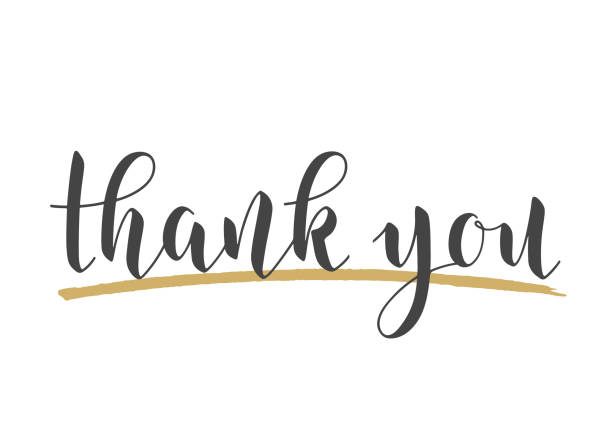